---
---
# Loss Functions
---
---

## Libraries Import

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

## Loading Data

### Fashion MNIST
It dataset is a modern alternative to the traditional MNIST dataset, a staple in the machine learning community for handwriting recognition tasks. Developed as a more challenging and representative benchmark for machine learning algorithms, Fashion MNIST comprises grayscale images of various fashion products from 10 different categories.

### Key Features of Fashion MNIST:

- **Dataset Size:** Fashion MNIST consists of a total of 70,000 images, divided into a training set of 60,000 images and a test set of 10,000 images.
- **Image Details:** Each image in the dataset is 28x28 pixels in size, represented in grayscale (1 channel).
- **Categories:** The dataset includes 10 types of fashion items:
>- T-shirt/top
>- Trouser
>- Pullover
>- Dress
>- Coat
>- Sandal
>- Shirt
>- Sneaker
>- Bag
>- Ankle boot

### Purpose and Applications:

Fashion MNIST is specifically designed to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits but involves a different, arguably more complex, set of images.



In [2]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

# normalize the data
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

print("Data loaded and normalized.")

Data loaded and normalized.


In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [5]:
# the first image in the training set represents a Bag
class_names[y_train[0]]

'Bag'

## Loss Functions
In classification tasks, loss functions measure the inconsistency between predicted values and actual targets. Here are the types of crossentropy losses we'll discuss:

>- **Binary Crossentropy:** Used when there are only two label classes (assumed to be 0 and 1). It is suitable for binary classification tasks.
>- **Categorical Crossentropy:** Used when labeling is done with one-hot encoding, i.e., each label is a vector equal in length to the number of classes, filled with 0s except for a 1 at the index of the class.
>- **Sparse Categorical Crossentropy:** Used when labels are provided as integers. It’s more memory efficient as it uses a single integer for class label rather than a whole vector.

## Binary Crossentropy

Binary crossentropy is suited for problems where each instance can only belong to one of two classes. It measures the distance between the actual class and the predicted probability of the class being positive. A critical aspect of binary crossentropy is that it heavily penalizes predictions that are confidently incorrect, which helps in driving more certain predictions in binary classification tasks.

For binary crossentropy, let’s assume our dataset is binary classified. Here’s how you could set it up:



In [27]:
# Creating a binary dataset
binary_labels = np.where(y_train % 2 == 0, 0, 1)  # Convert labels to 0 or 1 based on even or odd class
binary_labels_valid = np.where(y_valid % 2 == 0, 0, 1)  # Convert labels to 0 or 1 based on even or odd class

# Model setup for binary classification
model_binary = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation function for binary output
])
model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

model_binary.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Train the model
with tf.device('/GPU:0'):  # Explicitly run on GPU:0 if available for running speed
  history = model_binary.fit(X_train, binary_labels, validation_data=(X_valid, binary_labels_valid), epochs=10, batch_size=32, verbose=1)

  # Evaluate the model
  loss, accuracy = model_binary.evaluate(X_valid, y_valid, verbose=0)
  print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9861 - val_loss: 0.0719 - val_accuracy: 0.9810
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9870 - val_loss: 0.0778 - val_accuracy: 0.9765
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9869 - val_loss: 0.0859 - val_accuracy: 0.9755
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0329 - accuracy: 0.9873 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 5/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9882 - val_loss: 0.0813 - val_accuracy: 0.9778
Epoch 6/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9886 - val_loss: 0.0714 - val_accuracy: 0.9793
Epoch 7/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0292 - accuracy: 0.9892 - val_loss: 0.0747 - val_accuracy:

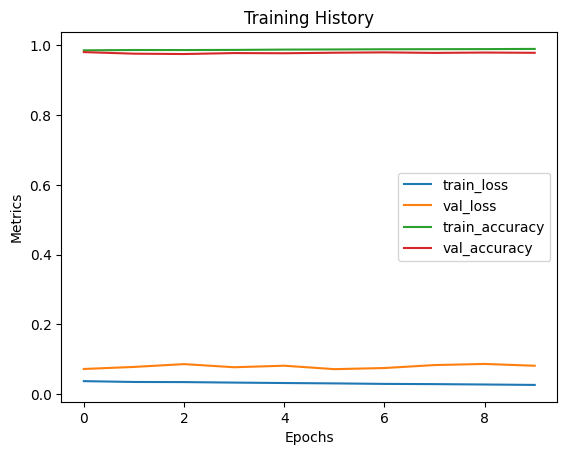

In [33]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training History')
plt.legend()
plt.show()


## Categorical Crossentropy

Categorical crossentropy is used when you have multiple classes but each instance belongs strictly to one class. This loss function is ideal for multi-class classification problems where the output layer uses a softmax activation function. The softmax function outputs a probability distribution across multiple classes, and categorical crossentropy assesses the similarity between the actual distribution and the predicted distribution.

For categorical crossentropy, labels need to be one-hot encoded:

In [36]:
# One-hot encoding labels
categorical_labels = tf.keras.utils.to_categorical(y_train, num_classes=10)
categorical_labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=10)
print(categorical_labels.shape)
print(categorical_labels_valid.shape)

# Model setup for multi-class classification
model_categorical = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Softmax for multi-class probability output
])
model_categorical.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model_categorical.summary()

(56000, 10)
(4000, 10)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Train the model
with tf.device('/GPU:0'):  # Explicitly run on GPU:0 if available for running speed
  history = model_categorical.fit(X_train, categorical_labels, validation_data=(X_valid, categorical_labels_valid), epochs=10, batch_size=32, verbose=1)

  # Evaluate the model
  loss, accuracy = model_categorical.evaluate(X_valid, categorical_labels_valid, verbose=0)
  print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1750/1750 [==============================] - 46s 3ms/step - loss: 0.5083 - accuracy: 0.8204 - val_loss: 0.4224 - val_accuracy: 0.8503
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8620 - val_loss: 0.3661 - val_accuracy: 0.8673
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8768 - val_loss: 0.3466 - val_accuracy: 0.8788
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3157 - accuracy: 0.8849 - val_loss: 0.3584 - val_accuracy: 0.8723
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8913 - val_loss: 0.3564 - val_accuracy: 0.8650
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8954 - val_loss: 0.3262 - val_accuracy: 0.8840
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8989 - val_loss: 0.3187 - val_accuracy

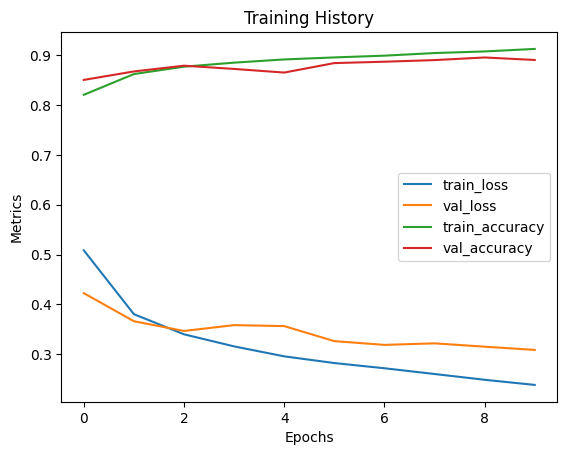

In [38]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training History')
plt.legend()
plt.show()


## Sparse Categorical Crossentropy

Sparse categorical crossentropy offers a practical advantage when dealing with a large number of classes. It avoids the computational overhead of converting the class labels into a one-hot encoded format, thereby saving memory and speeding up computations. It is particularly useful in scenarios where the output classes are mutually exclusive and the labels are integers.

For sparse categorical crossentropy, you can use labels as integers:



In [40]:
# Model setup for using integer labels directly
model_sparse = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_sparse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model_sparse.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Train the model
with tf.device('/GPU:0'):  # Explicitly run on GPU:0 if available for running speed
  history = model_sparse.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32, verbose=1)

  # Evaluate the model
  loss, accuracy = model_sparse.evaluate(X_valid, y_valid, verbose=0)
  print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5015 - accuracy: 0.8243 - val_loss: 0.4105 - val_accuracy: 0.8597
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8650 - val_loss: 0.3664 - val_accuracy: 0.8710
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8764 - val_loss: 0.3765 - val_accuracy: 0.8658
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8856 - val_loss: 0.3351 - val_accuracy: 0.8773
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8911 - val_loss: 0.3305 - val_accuracy: 0.8780
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8969 - val_loss: 0.3299 - val_accuracy: 0.8820
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2699 - accuracy: 0.8998 - val_loss: 0.3391 - val_accuracy:

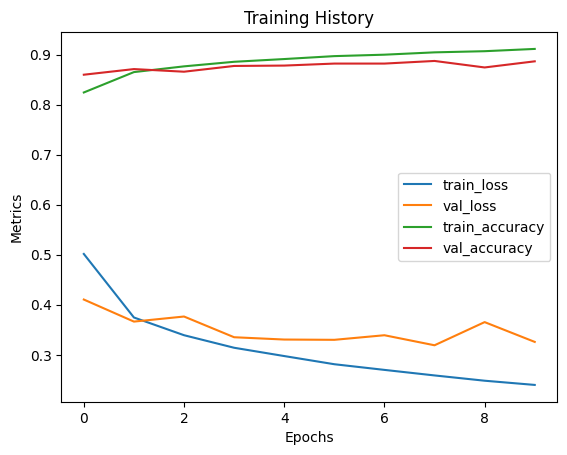

In [44]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training History')
plt.legend()
plt.show()


## Conclusion
The choice of loss function depends largely on how your labels are formatted. Binary crossentropy is used for binary labels, categorical crossentropy for one-hot encoded labels, and sparse categorical crossentropy for integer labels. Proper preparation of labels and output layer activation are critical to applying these loss functions correctly.